# Rule-Based Strategy



---

#### Compare the performances of portfolio and benchmark for in-sample and out-of-sample periods

## Summary

We choose a stock, an in-sample period and an out-of-sample period. We optimize the stock's performance in the in-sample period (see `trading_strategy` in `rule_based_strategy.py`) without peeking at the out-of-sample period. Then we report the performances of the portfolio (only consisting of the stock) and benchmark for both periods.

* In this notebook, we choose the symbol JPM
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is ``$``100,000.
* Allowable positions are: 1000 shares long, 1000 shares short, 0 shares.
* Benchmark: The performance of a portfolio starting with ``$``100,000 cash, investing in 1000 shares of JPM and holding that position.
* There is no limit on leverage.
* Transaction costs: Commission: $9.95, Impact: 0.005.

__*The performance of portfolio is better than benchmark in both periods!*__

## Table of contents:
[1) In-sample performance](#first)

[2) Out-of-sample performance](#second)

Import relevant libraries and modules

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from util import get_data
from marketsim import market_simulator
from indicators import get_momentum, get_sma_indicator, get_bollinger_bands, \
compute_bollinger_value, plot_momentum, plot_sma_indicator, plot_bollinger
from manualStrategy import RuleBasedStrategy
import matplotlib.pyplot as plt
%matplotlib inline

Starting cash and symbol of interest

In [2]:
start_val = 100000
symbol = "JPM"

---
## 1) In-sample performance <a class="anchor" id="first"></a>

Show the performances of portfolio and benchmark in the in-sample period

Specify the start and end dates for this period

In [3]:
start_d = dt.datetime(2008, 1, 1)
end_d = dt.datetime(2009, 12, 31)

Get benchmark data

In [4]:
benchmark_prices = get_data([symbol], pd.date_range(start_d, end_d), addSPY=False).dropna()

Create benchmark trades: buy 1000 shares of symbol, hold them till the last date

In [5]:
df_benchmark_trades = pd.DataFrame(
        data=[(benchmark_prices.index.min(), symbol, "BUY", 1000), 
        (benchmark_prices.index.max(), symbol, "SELL", 1000)], 
        columns=["Date", "Symbol", "Order", "Shares"])
df_benchmark_trades.set_index("Date", inplace=True)

Create an instance of RuleBasedStrategy and retrieve a trades dataframe via test_policy

In [6]:
rule_based = RuleBasedStrategy()
df_trades = rule_based.test_policy(symbol=symbol, start_date=start_d, end_date=end_d)
print (df_trades)

/home/emi/Jupyter/ML4T_2018Spring/manual_strategy/indicators.py:100: FutureWarning:

pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)



           Symbol Order  Shares
Date                           
2008-02-13    JPM  SELL    1000
2009-12-31    JPM   BUY    1000


Retrieve performance stats via a market simulator

Training data for JPM
Date Range: 2008-01-01 00:00:00 to 2009-12-31 00:00:00
Sharpe Ratio of Portfolio: 0.12818919564863512
Sharpe Ratio of Benchmark : 0.1533866908360293

Cumulative Return of Portfolio: 0.0032223022801134427
Cumulative Return of Benchmark : 0.010236207848477452

Standard Deviation of Portfolio: 0.015281203422316826
Standard Deviation of Benchmark : 0.017041225678409405

Average Daily Return of Portfolio: 0.00012339816715815674
Average Daily Return of Benchmark : 0.00016466004720283744

Final Portfolio Value: 100110.45
Final Benchmark Value: 100819.25


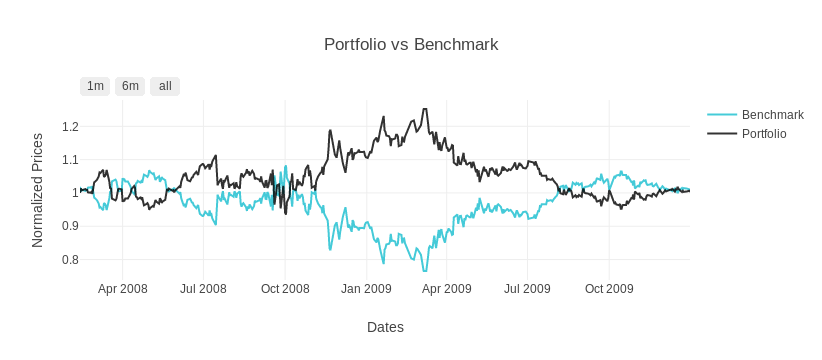

In [7]:
print ("Training data for {}".format(symbol))
print ("Date Range: {} to {}".format(start_d, end_d))
market_simulator(df_trades, df_benchmark_trades, start_val=start_val)

---
## 2) Out-of-sample performance <a class="anchor" id="second"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [8]:
start_d = dt.datetime(2010, 1, 1)
end_d = dt.datetime(2011, 12, 31)

Get benchmark data

In [9]:
benchmark_prices = get_data([symbol], pd.date_range(start_d, end_d), addSPY=False).dropna()

Create benchmark trades: buy 1000 shares of symbol, hold them till the last date

In [10]:
df_benchmark_trades = pd.DataFrame(
        data=[(benchmark_prices.index.min(), symbol, "BUY", 1000), 
        (benchmark_prices.index.max(), symbol, "SELL", 1000)], 
        columns=["Date", "Symbol", "Order", "Shares"])
df_benchmark_trades.set_index("Date", inplace=True)

Create an instance of RuleBasedStrategy and retrieve a trades dataframe via test_policy

In [11]:
rule_based = rbs.RuleBasedStrategy()
df_trades = rule_based.test_policy(symbol=symbol, start_date=start_d, end_date=end_d)
print (df_trades)

NameError: name 'rbs' is not defined

Retrieve performance stats via a market simulator

In [ ]:
print ("Training data for {}".format(symbol))
print ("Date Range: {} to {}".format(start_d, end_d))
market_simulator(df_trades, df_benchmark_trades, start_val=start_val)